## Example of MNIST - using Logistic Regression

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [4]:
!pip list | grep matplotlib

matplotlib                         2.2.2    


In [5]:
%matplotlib inline

In [6]:
from sklearn.datasets import fetch_mldata
# Change data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')

In [7]:
type(mnist)

sklearn.utils.Bunch

In [12]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
import pandas as pd

# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Print out `digits`
print(digits)

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0

In [5]:
# Import the `pandas` library as `pd`
import pandas as pd

# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Print out `digits`
print(digits)

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0

In [8]:
digits.shape

(3823, 65)

Automatically created module for IPython interactive environment
--------------------------------------
Sparsity with L1 penalty   : 80.24%
Test score with L1 penalty : 0.8317
Example run in             : 2.659 s


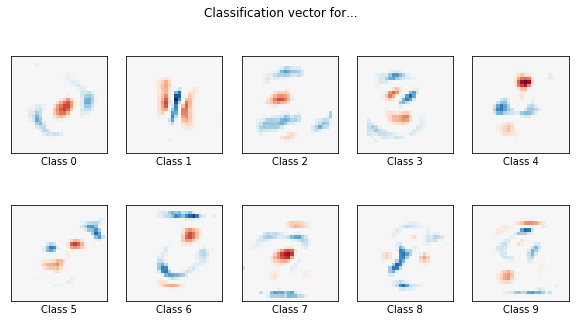

In [17]:
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from sklearn.externals.joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
try:
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

memory = Memory(get_data_home())


@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']

X, y = fetch_mnist()

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

#print('Best C % .4f' % clf.C_)
print("--------------------------------------")
print("Sparsity with L1 penalty   : %.2f%%" % sparsity)
print("Test score with L1 penalty : %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in             : %.3f s' % run_time)
plt.show()

In [9]:
X.shape

(70000, 784)